### Cho bộ dữ liệu us-state-college-pricing-2017.csv. Bộ dữ liệu này ghi lại các mức học phí của các trường đại học từ năm học 2004-05 đến 2017-18 theo từng quận (in-District) và tiểu bang (in-State)

* Đọc dữ liệu
* Xem xét vấn đề dữ liệu cần khắc phục
* Chuẩn lại dữ liệu để khắc phục vấn đề trên (tham khảo kết quả gợi ý như hình sau)
![kết quả chuẩn hóa](hinh1.png)


* Vẽ biểu đồ để theo dõi mức học phí trung bình theo từng năm học như sau
![In-District](hinh2.png)
![In-State](hinh3.png)

### Đặt yêu cầu ngược lại là cần phải tạo pivot table để xem thống kê theo State và Year 

* Hãy chuyển dữ liệu mới làm ở trên về dạng thống kê 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('us-state-college-pricing-2017.csv',header=2)
df.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368",...,"$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985",...,"$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355",...,"$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516",...,"$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [4]:
df.columns

Index(['State', '2004-05', '2005-06', '2006-07', '  2007-08 ', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2004-05.1', '2005-06.1', '2006-07.1',
       '  2007-08 .1', '2008-09.1', '2009-10.1', '2010-11.1', '2011-12.1',
       '2012-13.1', '2013-14.1', '2014-15.1', '2015-16.1', '2016-17.1',
       '2017-18.1'],
      dtype='object')

In [5]:
df.shape

(52, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         52 non-null     object
 1   2004-05       49 non-null     object
 2   2005-06       49 non-null     object
 3   2006-07       49 non-null     object
 4     2007-08     49 non-null     object
 5   2008-09       49 non-null     object
 6   2009-10       49 non-null     object
 7   2010-11       49 non-null     object
 8   2011-12       49 non-null     object
 9   2012-13       49 non-null     object
 10  2013-14       49 non-null     object
 11  2014-15       49 non-null     object
 12  2015-16       49 non-null     object
 13  2016-17       49 non-null     object
 14  2017-18       49 non-null     object
 15  2004-05.1     52 non-null     object
 16  2005-06.1     52 non-null     object
 17  2006-07.1     52 non-null     object
 18    2007-08 .1  52 non-null     object
 19  2008-09.1 

In [7]:
df.isnull().any()

State           False
2004-05          True
2005-06          True
2006-07          True
  2007-08        True
2008-09          True
2009-10          True
2010-11          True
2011-12          True
2012-13          True
2013-14          True
2014-15          True
2015-16          True
2016-17          True
2017-18          True
2004-05.1       False
2005-06.1       False
2006-07.1       False
  2007-08 .1    False
2008-09.1       False
2009-10.1       False
2010-11.1       False
2011-12.1       False
2012-13.1       False
2013-14.1       False
2014-15.1       False
2015-16.1       False
2016-17.1       False
2017-18.1       False
dtype: bool

In [8]:
df.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368",...,"$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985",...,"$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355",...,"$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516",...,"$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [9]:
df.columns

Index(['State', '2004-05', '2005-06', '2006-07', '  2007-08 ', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2004-05.1', '2005-06.1', '2006-07.1',
       '  2007-08 .1', '2008-09.1', '2009-10.1', '2010-11.1', '2011-12.1',
       '2012-13.1', '2013-14.1', '2014-15.1', '2015-16.1', '2016-17.1',
       '2017-18.1'],
      dtype='object')

In [10]:
df2y = df[df.columns[1:15].insert(0, 'State')]
df2y.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368","$4,350","$4,373","$4,425","$4,470","$4,487"
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985","$3,150","$3,264","$3,490","$3,593","$3,645"
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355","$2,445","$2,497","$2,538","$2,603","$2,606"
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516","$1,493","$1,467","$1,459","$1,450","$1,430"


In [11]:
df4y = df[df.columns[15:].insert(0, 'State')]
df4y.head()

,State,2004-05.1,2005-06.1,2006-07.1,2007-08 .1,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
0,Alaska,"$4,439","$4,752","$5,045","$5,200","$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [12]:
df4y.columns = df4y.columns.str.replace('\.\d','')
df4y.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
0,Alaska,"$4,439","$4,752","$5,045","$5,200","$5,206","$5,595","$5,907","$5,910","$6,181","$6,167","$6,307","$6,876","$7,250","$7,438"
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530"
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553"
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218"
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680"


In [13]:
df2y_new = pd.melt(frame=df2y, id_vars='State', var_name='College_Year', value_name='In-District 2 Year Tuition Fee')
df2y_new.head()

,State,College_Year,In-District 2 Year Tuition Fee
0,Alaska,2004-05,NaN
1,Alabama,2004-05,"$3,526"
2,Arkansas,2004-05,"$2,422"
3,Arizona,2004-05,"$1,800"
4,California,2004-05,"$1,044"


In [14]:
df4y_new = pd.melt(frame=df4y, id_vars='State', var_name='College_Year', value_name='In-State 4 Year Tuition Fee')
df4y_new.head()

,State,College_Year,In-State 4 Year Tuition Fee
0,Alaska,2004-05,"$4,439"
1,Alabama,2004-05,"$5,829"
2,Arkansas,2004-05,"$5,921"
3,Arizona,2004-05,"$5,271"
4,California,2004-05,"$5,422"


In [15]:
df_2y_4y = pd.merge(df2y_new, df4y_new, on=['State','College_Year'])
df_2y_4y.head()

,State,College_Year,In-District 2 Year Tuition Fee,In-State 4 Year Tuition Fee
0,Alaska,2004-05,NaN,"$4,439"
1,Alabama,2004-05,"$3,526","$5,829"
2,Arkansas,2004-05,"$2,422","$5,921"
3,Arizona,2004-05,"$1,800","$5,271"
4,California,2004-05,"$1,044","$5,422"


In [16]:
df_2y_4y.fillna('0', inplace=True)

In [17]:
df_2y_4y['In-District 2 Year Tuition Fee'] = df_2y_4y['In-District 2 Year Tuition Fee'].replace('\D','',regex=True).astype(int)
df_2y_4y['In-State 4 Year Tuition Fee'] = df_2y_4y['In-State 4 Year Tuition Fee'].replace('\D','',regex=True).astype(int)
df_2y_4y

,State,College_Year,In-District 2 Year Tuition Fee,In-State 4 Year Tuition Fee
0,Alaska,2004-05,0,4439
1,Alabama,2004-05,3526,5829
2,Arkansas,2004-05,2422,5921
3,Arizona,2004-05,1800,5271
4,California,2004-05,1044,5422
...,...,...,...,...
723,Vermont,2017-18,7980,16043
724,Washington,2017-18,4376,9480
725,Wisconsin,2017-18,4394,8962
726,West Virginia,2017-18,4299,7887


In [18]:
df_group = df_2y_4y.groupby(by=['College_Year']).mean()
df_group.columns=['Avg. In-District 2 Year Tuition Fee', 'Avg. In-State 4 Year Tuition Fee']
df_group['Avg. In-District 2 Year Tuition Fee'] = df_group['Avg. In-District 2 Year Tuition Fee'].apply(lambda x: round(x, 2))
df_group['Avg. In-State 4 Year Tuition Fee'] = df_group['Avg. In-State 4 Year Tuition Fee'].apply(lambda x: round(x, 2))
df_group.reset_index(inplace=True)
df_group

,College_Year,Avg. In-District 2 Year Tuition Fee,Avg. In-State 4 Year Tuition Fee
0,2007-08,3013.96,7114.10
1,2004-05,2875.92,6413.17
2,2005-06,2931.83,6657.37
3,2006-07,2956.60,6823.33
4,2008-09,2993.52,7178.81
5,2009-10,3226.79,7813.81
6,2010-11,3371.88,8321.87
7,2011-12,3478.25,8621.94
8,2012-13,3604.44,8925.94
9,2013-14,3669.35,9009.58


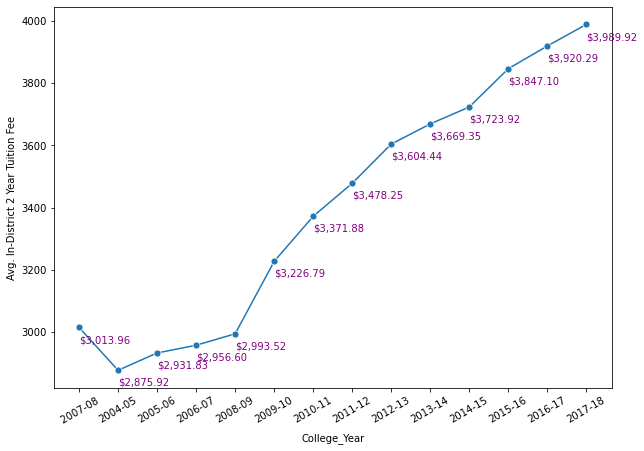

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=df_group, x='College_Year', y='Avg. In-District 2 Year Tuition Fee', 
             marker= '.', markersize=14, ax=ax)
plt.xticks(rotation='30')
# label points on the plot
for x, y in zip(df_group['College_Year'], df_group['Avg. In-District 2 Year Tuition Fee']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y-50, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '${:,.2f}'.format(y), # data label, formatted to ignore decimals
 color = 'purple') # set colour of line
    
# plt.show()
plt.savefig("hinh1.png")

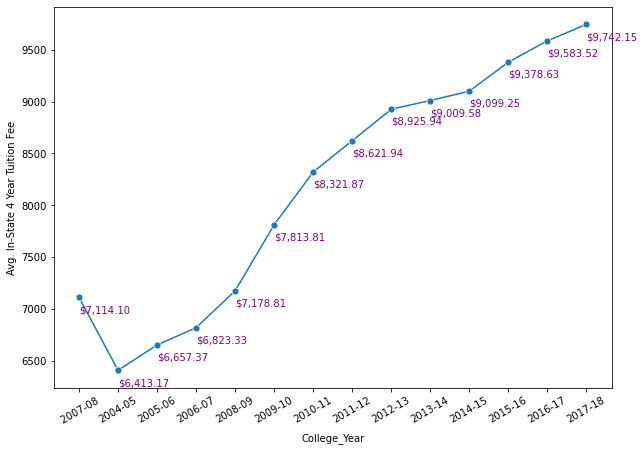

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=df_group, x='College_Year', y='Avg. In-State 4 Year Tuition Fee', 
             marker= '.', markersize=14, ax=ax)
plt.xticks(rotation='30')
# label points on the plot
for x, y in zip(df_group['College_Year'], df_group['Avg. In-State 4 Year Tuition Fee']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '${:,.2f}'.format(y), # data label, formatted to ignore decimals
 color = 'purple') # set colour of line
    
# plt.show()
plt.savefig("hinh2.png")

## Pivot data


In [21]:
df_2y_sep = df_2y_4y.iloc[:,0:-1]
df_2y_sep = df_2y_sep.rename(columns = {'College_Year': 'Year'})
df_2y_sep.head()

,State,Year,In-District 2 Year Tuition Fee
0,Alaska,2004-05,0
1,Alabama,2004-05,3526
2,Arkansas,2004-05,2422
3,Arizona,2004-05,1800
4,California,2004-05,1044


In [22]:
df_4y_sep = df_2y_4y[['State','College_Year','In-State 4 Year Tuition Fee']]
df_4y_sep = df_4y_sep.rename(columns = {'College_Year': 'Year'})
df_4y_sep['Year'] = df_4y_sep['Year'].apply(lambda x: x+'.1')
df_4y_sep.head()

,State,Year,In-State 4 Year Tuition Fee
0,Alaska,2004-05.1,4439
1,Alabama,2004-05.1,5829
2,Arkansas,2004-05.1,5921
3,Arizona,2004-05.1,5271
4,California,2004-05.1,5422


In [23]:
df_pivot_2y = df_2y_sep.pivot(index='State', columns='Year', values='In-District 2 Year Tuition Fee')
df_pivot_2y.head()

Year,2007-08,2004-05,2005-06,2006-07,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
State,,,,,,,,,,,,,,
Alabama,3301,3526,3420,3351,3155,3227,3837,4345,4368,4350,4373,4425,4470,4487
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,1981,1800,1907,1997,2026,2180,2222,2331,2355,2445,2497,2538,2603,2606
Arkansas,2513,2422,2480,2520,2555,2703,2835,2885,2985,3150,3264,3490,3593,3645
California,744,1044,1015,871,706,929,920,1212,1516,1493,1467,1459,1450,1430


In [24]:
df_pivot_4y = df_4y_sep.pivot(index='State', columns='Year', values='In-State 4 Year Tuition Fee')
df_pivot_4y.head()

Year,2007-08 .1,2004-05.1,2005-06.1,2006-07.1,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
State,,,,,,,,,,,,,,
Alabama,6163,5829,5991,5901,6641,7374,8279,8669,9332,9599,9740,9996,10256,10530
Alaska,5200,4439,4752,5045,5206,5595,5907,5910,6181,6167,6307,6876,7250,7438
Arizona,5828,5271,5555,5622,6214,7450,9067,10223,10394,10561,10681,10907,11119,11218
Arkansas,6580,5921,6239,6392,6581,6797,7078,7210,7474,7599,7802,8085,8396,8553
California,5818,5422,5670,5472,6049,7445,8404,9679,9601,9512,9423,9505,9462,9680


In [25]:
df_pivot = pd.merge(df_pivot_2y, df_pivot_4y, on = 'State')
df_pivot.head()

Year,2007-08,2004-05,2005-06,2006-07,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
State,,,,,,,,,,,,,,,,,,,,,
Alabama,3301,3526,3420,3351,3155,3227,3837,4345,4368,4350,...,6641,7374,8279,8669,9332,9599,9740,9996,10256,10530
Alaska,0,0,0,0,0,0,0,0,0,0,...,5206,5595,5907,5910,6181,6167,6307,6876,7250,7438
Arizona,1981,1800,1907,1997,2026,2180,2222,2331,2355,2445,...,6214,7450,9067,10223,10394,10561,10681,10907,11119,11218
Arkansas,2513,2422,2480,2520,2555,2703,2835,2885,2985,3150,...,6581,6797,7078,7210,7474,7599,7802,8085,8396,8553
California,744,1044,1015,871,706,929,920,1212,1516,1493,...,6049,7445,8404,9679,9601,9512,9423,9505,9462,9680


In [26]:
df_pivot = df_pivot.replace(0,np.nan)
df_pivot.head()

Year,2007-08,2004-05,2005-06,2006-07,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,...,2008-09.1,2009-10.1,2010-11.1,2011-12.1,2012-13.1,2013-14.1,2014-15.1,2015-16.1,2016-17.1,2017-18.1
State,,,,,,,,,,,,,,,,,,,,,
Alabama,3301.0,3526.0,3420.0,3351.0,3155.0,3227.0,3837.0,4345.0,4368.0,4350.0,...,6641,7374,8279,8669,9332,9599,9740,9996,10256,10530
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5206,5595,5907,5910,6181,6167,6307,6876,7250,7438
Arizona,1981.0,1800.0,1907.0,1997.0,2026.0,2180.0,2222.0,2331.0,2355.0,2445.0,...,6214,7450,9067,10223,10394,10561,10681,10907,11119,11218
Arkansas,2513.0,2422.0,2480.0,2520.0,2555.0,2703.0,2835.0,2885.0,2985.0,3150.0,...,6581,6797,7078,7210,7474,7599,7802,8085,8396,8553
California,744.0,1044.0,1015.0,871.0,706.0,929.0,920.0,1212.0,1516.0,1493.0,...,6049,7445,8404,9679,9601,9512,9423,9505,9462,9680


In [27]:
df.shape, df_pivot.shape

((52, 29), (52, 28))